In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/featuresfloatvf.csv')
data =data.drop('Unnamed: 0', axis=1)
# x=data.loc[:,['statuses' , 'date_joined' , 'most_recent_post' , 'following' , 'followers' , 'likes', 'retweet' , 'retweeted_count'  ,'avg_tweets_by_hour_of_day', 'avg_tweets_by_day_of_week']]
x=data.iloc[:, :-1]
y = data.account_type.values.tolist()

Accuracy: 0.7390909090909091

Training Accuracy score: 0.7322727272727273
Testing Accuracy score: 0.7390909090909091
classification_report 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      2158
           1       0.75      0.74      0.74      2242

    accuracy                           0.74      4400
   macro avg       0.74      0.74      0.74      4400
weighted avg       0.74      0.74      0.74      4400



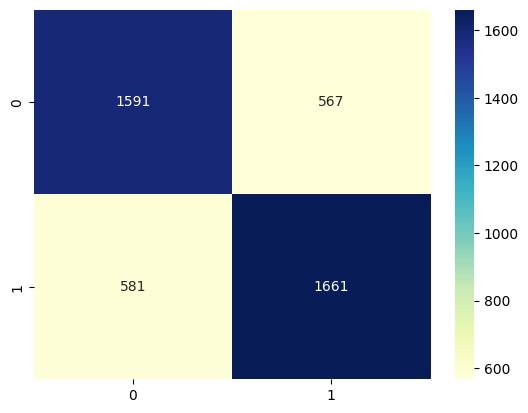

In [4]:
from sklearn.neural_network import MLPClassifier



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

# Build the model
mlp = MLPClassifier( activation='relu', solver='adam', max_iter=1000)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
print('Accuracy:', accuracy)
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()